In [1]:
import multiprocessing as mp
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import scipy.sparse as sps

In [2]:
args = type('', (), {})
args.src = 'src.npy'
args.dst = 'dst.npy'
args.y = 'y.npy'

In [3]:
with mp.Pool(3) as pool:
    src, dst, y = pool.map(np.load, [args.src, args.dst, args.y])

n = len(y)
dat = np.ones_like(src)
a = sps.coo_matrix((dat, (src, dst)), shape=(n, n))
d = a.sum(axis=1)

In [4]:
np.min(d), np.max(d), np.mean(d), np.std(d)

(1, 834, 44.28546888200507, 56.48781501483306)

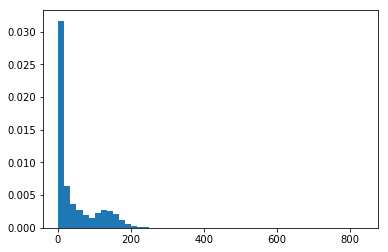

In [5]:
_ = pl.hist(d, bins=50, normed=True)